# KAN-CDSCO2004U  Machine Learning and Deep Learning

## Lab 1: Data Preprocessing with the Tips Dataset
**Estimated time: 2 hours**

### Learning Objectives
By the end of this exercise, you will be able to:
- Explore and summarize a dataset using pandas
- Handle missing values with different imputation strategies
- Encode categorical variables for ML models
- Create new features from existing data
- Scale features using Min-Max and Standard scaling
- Build preprocessing pipelines with scikit-learn

In this exercise you will practice cleaning and preprocessing data using the Tips Dataset. 

**How to work through this notebook:**
- 🏃 **RUN** cells = Just execute the code to see the output
- ✏️ **TODO** cells = Write your own code or answer questions
- 📖 **READ** cells = Explanations to help you understand

---
## Setup

🏃 **RUN** the cells below to install dependencies and load the data.

In [1]:
# UNCOMMENT the line below (remove the '#') if you need to install the libraries. 
# Once installed, you can add the '#' back to skip this step in the future.

# # %pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Import needed libraries
# Author: Luca Gudi (lgg.digi@cbs.dk)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Tips dataset from seaborn
df = sns.load_dataset("tips")

# Manually inject some NaN values to make the imputing section relevant
df.iloc[0:5, 0] = np.nan  # Put some NaNs in 'total_bill'

## 1. Exploring the Data

🏃 **RUN** the cells below to explore the dataset and find missing values.

In [4]:
df.head()  # See the first five rows

,total_bill,tip,sex,smoker,day,time,size
0,NaN,1.01,Female,No,Sun,Dinner,2
1,NaN,1.66,Male,No,Sun,Dinner,3
2,NaN,3.50,Male,No,Sun,Dinner,3
3,NaN,3.31,Male,No,Sun,Dinner,2
4,NaN,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info() # Get information on each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  239 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()  # Get summary statistics for numeric features
df.shape

(244, 7)

### ✏️ TODO: Answer the following questions (based on the outputs above)

**Q1: How many observations are there in the data?**

Your answer: ___

**Q2: Which features are numerical?**

Your answer: ___

**Q3: Which features are categorical?**

Your answer: ___

In [7]:
# How many missing values does each feature have?

df.isna().sum()

total_bill    5
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# How many unique values does each categorical feature have?

df[["sex", "smoker", "day", "time"]].nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [9]:
# What are the unique values in the 'day' feature?

df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

📖 We injected 5 missing values in `total_bill`. Let's inspect those rows:

In [10]:
# Show rows where total_bill is missing
df[df["total_bill"].isna()]

,total_bill,tip,sex,smoker,day,time,size
0,NaN,1.01,Female,No,Sun,Dinner,2
1,NaN,1.66,Male,No,Sun,Dinner,3
2,NaN,3.50,Male,No,Sun,Dinner,3
3,NaN,3.31,Male,No,Sun,Dinner,2
4,NaN,3.61,Female,No,Sun,Dinner,4


In [11]:
# Show the distribution of tips by sex

df.groupby("sex", observed=True)["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [12]:
# Show the distribution of total_bill by day

df.groupby("day", observed=True)["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.155,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.750,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.740,50.81
Sun,71.0,21.557042,9.016997,7.25,14.9350,19.49,26.295,48.17


## 2. Visualizing the Data

🏃 **RUN** the cells below to explore the data visually. Pay attention to the relationships between features.

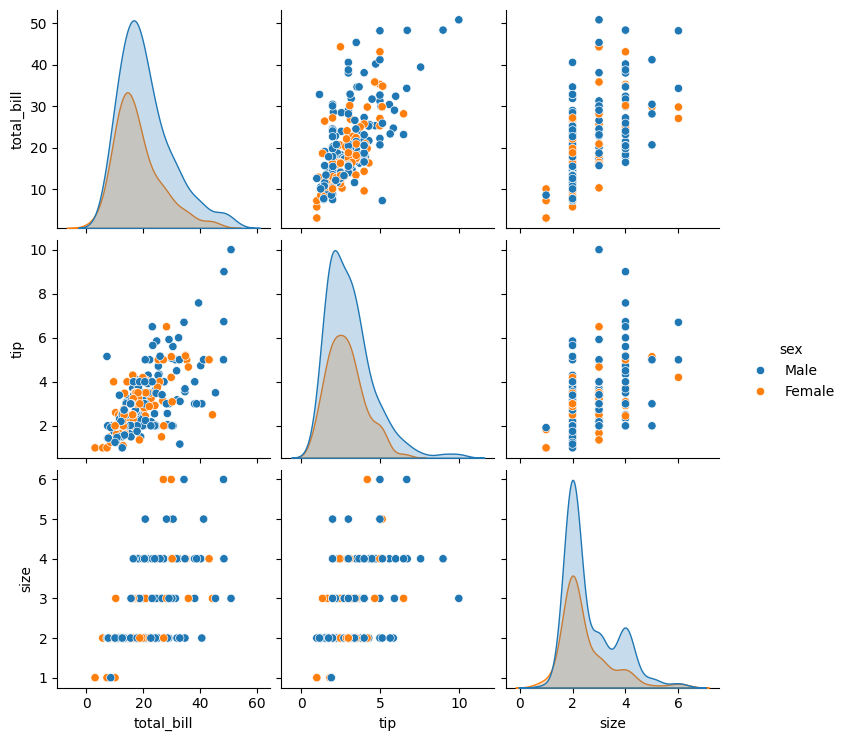

In [13]:
sns.pairplot(df, hue="sex")

📖 Notice the positive correlation between `total_bill` and `tip`. Let's zoom in:

<Axes: xlabel='total_bill', ylabel='tip'>

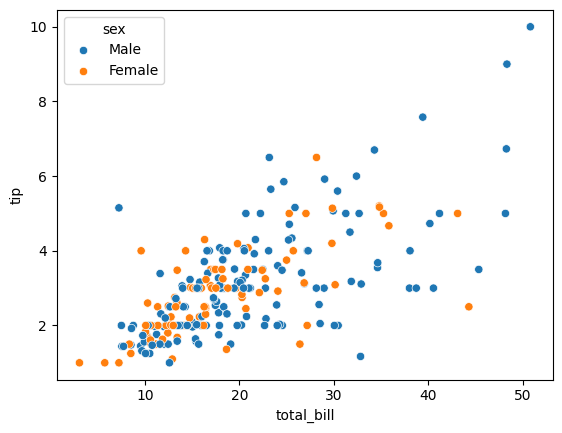

In [14]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")

📖 Let's compare distributions by time of day and day of week:

<Axes: xlabel='time', ylabel='total_bill'>

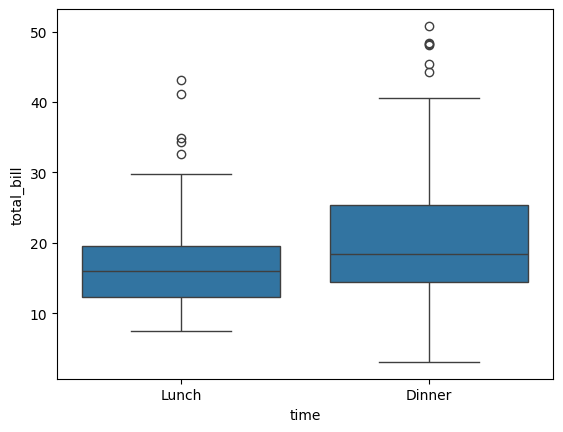

In [15]:
sns.boxplot(data=df, x="time", y="total_bill")

<Axes: xlabel='day', ylabel='tip'>

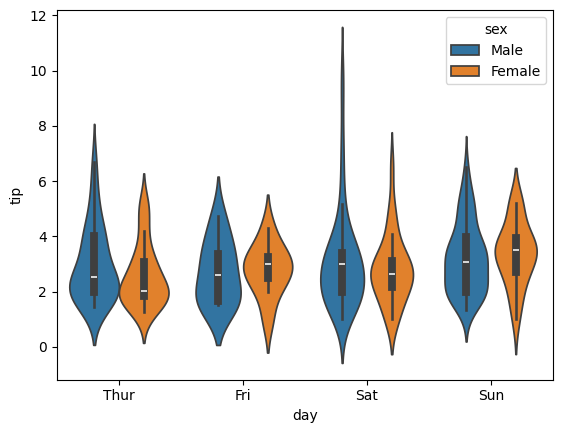

In [16]:
sns.violinplot(data=df, x="day", y="tip", hue="sex")

## 3. Imputing Missing Values

Now let's handle the missing values. We injected some NaN values in the `total_bill` column earlier. Let's practice different imputation strategies.

📖 **Why impute instead of dropping rows?**

Sometimes we have many missing values and removing them would leave us with too little data. In other cases, the missing values might be informative. For this exercise, we'll practice imputation techniques that are essential for real-world data.

In [17]:
# Let's try imputing with the mean

imputer = SimpleImputer(strategy="mean")
df["total_bill_imputed_mean"] = imputer.fit_transform(df[["total_bill"]])

# Let's try imputing with the median
imputer = SimpleImputer(strategy="median")
df["total_bill_imputed_median"] = imputer.fit_transform(df[["total_bill"]])

# Compare the results
df[["total_bill", "total_bill_imputed_mean", "total_bill_imputed_median"]].head(10)

,total_bill,total_bill_imputed_mean,total_bill_imputed_median
0,NaN,19.795649,17.78
1,NaN,19.795649,17.78
2,NaN,19.795649,17.78
3,NaN,19.795649,17.78
4,NaN,19.795649,17.78
5,25.29,25.290000,25.29
6,8.77,8.770000,8.77
7,26.88,26.880000,26.88
8,15.04,15.040000,15.04
9,14.78,14.780000,14.78


array([[<Axes: title={'center': 'total_bill_imputed_mean'}>,
        <Axes: title={'center': 'total_bill_imputed_median'}>]],
      dtype=object)

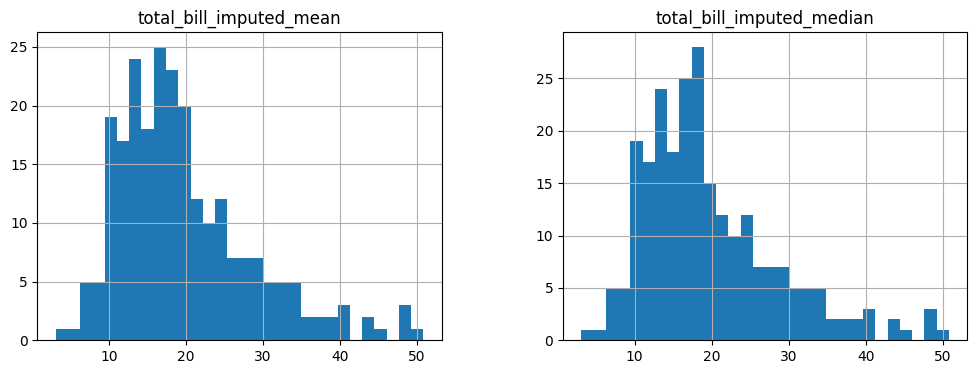

In [18]:
# Let's visualize the difference

df[["total_bill_imputed_mean", "total_bill_imputed_median"]].hist(bins=30, figsize=(12, 4))

📖 The histograms are similar because `total_bill` is roughly symmetric. For skewed data, median imputation is often preferred as it's less sensitive to outliers.

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_imputed_mean,total_bill_imputed_median
0,NaN,1.01,Female,No,Sun,Dinner,2,19.795649,17.78
1,NaN,1.66,Male,No,Sun,Dinner,3,19.795649,17.78
2,NaN,3.50,Male,No,Sun,Dinner,3,19.795649,17.78
3,NaN,3.31,Male,No,Sun,Dinner,2,19.795649,17.78
4,NaN,3.61,Female,No,Sun,Dinner,4,19.795649,17.78


## 4. Encoding Categorical Variables

Machine learning algorithms typically require numeric input. Let's convert our categorical variables to numeric form using different encoding techniques.

In [20]:
# Reload the data to start fresh
df = sns.load_dataset("tips")

# Use LabelEncoder to convert sex to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [21]:
# Convert smoker to numeric
le = LabelEncoder()
df["smoker"] = le.fit_transform(df["smoker"])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [22]:
# Convert day and time to numeric
le = LabelEncoder()
df["day"] = le.fit_transform(df["day"])
df["time"] = le.fit_transform(df["time"])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


📖 Now all columns are numeric! 

**Note:** For categories with no natural order, one-hot encoding is often preferred over label encoding. We'll keep it simple here.

📖 **Ordinal Encoding:** For features with a natural order (like ratings), we preserve that order:

In [23]:
# Example of ordinal encoding (for demonstration purposes)
# Let's create a fake "service_quality" column with ordinal values
np.random.seed(42)
df["service_quality"] = np.random.choice(["Poor", "Fair", "Good", "Excellent"], size=len(df))

# Define the order
quality_mapping = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
df["service_quality"] = df["service_quality"].map(quality_mapping)
df.head()

,total_bill,tip,sex,smoker,day,time,size,service_quality
0,16.99,1.01,0,0,2,0,2,3
1,10.34,1.66,1,0,2,0,3,4
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,3
4,24.59,3.61,0,0,2,0,4,3


In [24]:
# Alternative approach using OrdinalEncoder from sklearn
from sklearn.preprocessing import OrdinalEncoder

# Recreate the column for demonstration
np.random.seed(42)
df["service_quality_text"] = np.random.choice(["Poor", "Fair", "Good", "Excellent"], size=len(df))

encoder = OrdinalEncoder(categories=[["Poor", "Fair", "Good", "Excellent"]])
df["service_quality_encoded"] = encoder.fit_transform(df[["service_quality_text"]])
df[["service_quality_text", "service_quality_encoded"]].head()

,service_quality_text,service_quality_encoded
0,Good,2.0
1,Excellent,3.0
2,Poor,0.0
3,Good,2.0
4,Good,2.0


## 5. Feature Engineering

Let's create some new features that might be useful for analysis or modeling.

In [25]:
# Create tip percentage feature
df["tip_percentage"] = (df["tip"] / df["total_bill"]) * 100
df.head()

,total_bill,tip,sex,smoker,day,time,size,service_quality,service_quality_text,service_quality_encoded,tip_percentage
0,16.99,1.01,0,0,2,0,2,3,Good,2.0,5.944673
1,10.34,1.66,1,0,2,0,3,4,Excellent,3.0,16.054159
2,21.01,3.50,1,0,2,0,3,1,Poor,0.0,16.658734
3,23.68,3.31,1,0,2,0,2,3,Good,2.0,13.978041
4,24.59,3.61,0,0,2,0,4,3,Good,2.0,14.680765


## 6. Feature Scaling

Different features often have different scales. Scaling helps many ML algorithms perform better and converge faster.

📖 **Why scale features?**

Many ML algorithms (like k-NN, SVM, neural networks) are sensitive to feature scales. If one feature ranges from 0-1 and another from 0-1000, the algorithm might give undue importance to the larger-scale feature. Common approaches:
- **Min-Max Scaling**: Scales to [0, 1] range
- **Standard Scaling**: Transforms to mean=0, std=1

In [26]:
# Min-Max Scaling: scales features to a range [0, 1]
scaler = MinMaxScaler()
df["total_bill_minmax"] = scaler.fit_transform(df[["total_bill"]])

# Compare original and scaled
df[["total_bill", "total_bill_minmax"]].head()

,total_bill,total_bill_minmax
0,16.99,0.291579
1,10.34,0.152283
2,21.01,0.375786
3,23.68,0.431713
4,24.59,0.450775


In [27]:
# Standard Scaling (Z-score normalization): mean=0, std=1
scaler = StandardScaler()
df["tip_standardized"] = scaler.fit_transform(df[["tip"]])

# Compare original and scaled
df[["tip", "tip_standardized"]].describe()

,tip,tip_standardized
count,244.000000,2.440000e+02
mean,2.998279,2.839259e-16
std,1.383638,1.002056e+00
min,1.000000,-1.447189e+00
25%,2.000000,-7.229713e-01
50%,2.900000,-7.117518e-02
75%,3.562500,4.086192e-01
max,10.000000,5.070772e+00


## 7. Preprocessing Pipelines

Scikit-learn's `Pipeline` class lets us chain multiple preprocessing steps together. This is cleaner and prevents data leakage during cross-validation.

🏃 **RUN** the cells below to see a basic pipeline in action.

In [28]:
# Reload the data with NaN values to start from the initial situation
df_raw = sns.load_dataset("tips")
df_raw.iloc[0:5, 0] = np.nan  # Put some NaNs in 'total_bill'

In [29]:
# Build the pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

In [30]:
# Use the pipeline on a feature

df_raw["total_bill"] = pipeline.fit_transform(df_raw[["total_bill"]])
df_raw

,total_bill,tip,sex,smoker,day,time,size
0,-0.222910,1.01,Female,No,Sun,Dinner,2
1,-0.222910,1.66,Male,No,Sun,Dinner,3
2,-0.222910,3.50,Male,No,Sun,Dinner,3
3,-0.222910,3.31,Male,No,Sun,Dinner,2
4,-0.222910,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,1.047251,5.92,Male,No,Sat,Dinner,3
240,0.838380,2.00,Female,Yes,Sat,Dinner,2
241,0.329187,2.00,Male,Yes,Sat,Dinner,2
242,-0.218394,1.75,Male,No,Sat,Dinner,2


## 8. ✏️ Final Exercise: Build Your Own Pipeline

Create a pipeline that processes the `tip` column by:
1. Imputing missing values (use mean strategy)
2. Applying StandardScaler

**Hint:** Follow the same pattern as the `total_bill` pipeline above.

In [31]:
# ✏️ YOUR CODE HERE: Build a pipeline for the 'tip' column

# Step 1: Reload fresh data
df_exercise = sns.load_dataset("tips")
df_exercise.iloc[10:15, 1] = np.nan  # Inject some NaN values in 'tip'

# Step 2: Build your pipeline (replace None with your code)
tip_pipeline = None  # Pipeline([...])

# Step 3: Apply the pipeline
# df_exercise["tip_processed"] = tip_pipeline.fit_transform(df_exercise[["tip"]])

# Step 4: Verify your results
# df_exercise[["tip", "tip_processed"]].head(15)

---
## Summary

In this lab, you learned how to:

| Section | Technique | sklearn Class |
|---------|-----------|---------------|
| 1. Exploration | `.info()`, `.describe()`, `.isna()` | - |
| 2. Visualization | Pairplot, boxplot, violin plot | - |
| 3. Imputation | Mean/Median imputation | `SimpleImputer` |
| 4. Encoding | Label encoding, Ordinal encoding | `LabelEncoder`, `OrdinalEncoder` |
| 5. Feature Engineering | Creating derived features | - |
| 6. Scaling | Min-Max, Standard scaling | `MinMaxScaler`, `StandardScaler` |
| 7-8. Pipelines | Chaining transformations | `Pipeline` |

**Next steps:** In upcoming labs, you'll use these preprocessing techniques as part of full ML workflows!